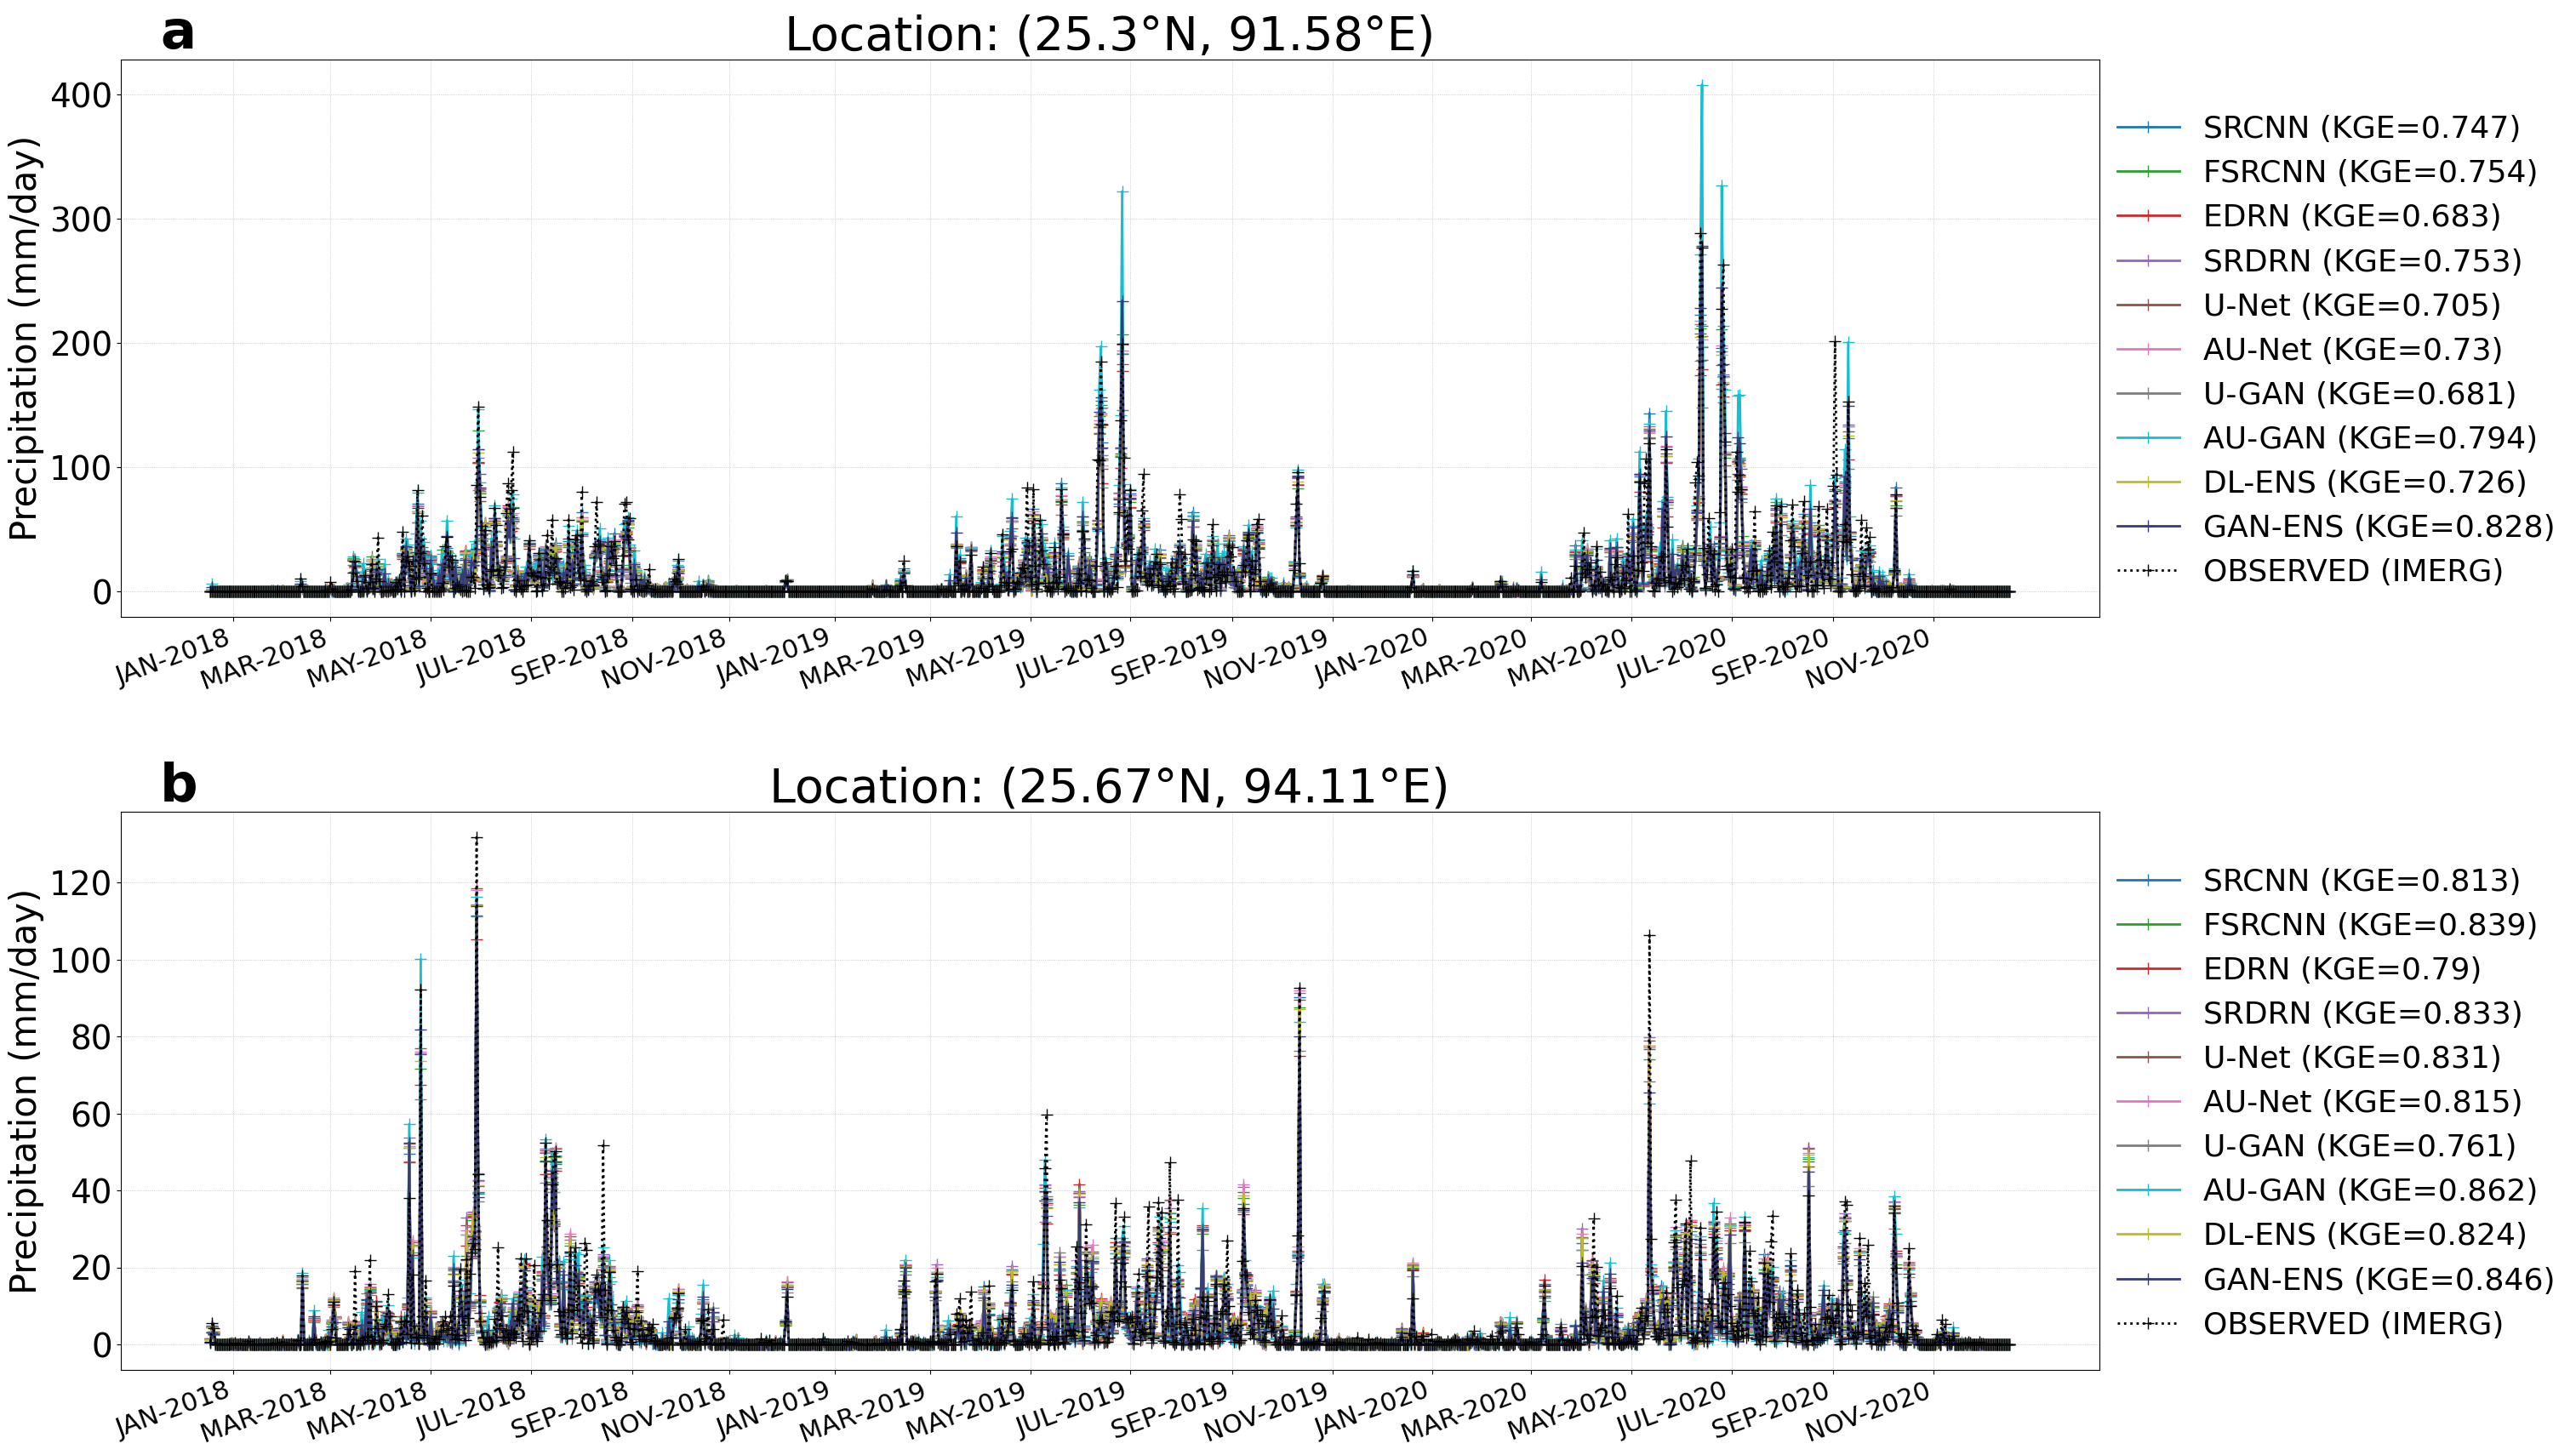

In [1]:
import numpy as np
import xarray as xr
import hydroeval as he
import matplotlib.pyplot as plt

def kge_score(y_true, y_pred):
    evaluations = y_true[~np.isnan(y_true)].flatten()
    simulations = y_pred[~np.isnan(y_pred)].flatten()    
    kge, r, alpha, beta = he.evaluator(he.kgeprime, simulations, evaluations)
    return kge[0]

def extract_latlon(ds, latitude, longitude):
    return ds.sel(lat=latitude, lon=longitude, method='nearest').prec.data

# # Load datafiles
# dpath = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_SRDRN_Downscaling/ANALYSE/DATA_GEN/DATA_2PLOT/v4'
# d = xr.open_dataset(f'{dpath}/IND_B1235_TSERIES_FLDMEAN_2018_2020_v4.nc')

linewidth = 2
markersize = 10
marker = '+'
r = 3
titlesize=40
xrotation=20
xticksize=22
yticksize=28
ylabelsize=30
abcdsize=45
legendsize=26

colors = [
    '#1f77b4',  # muted dark blue
    '#2ca02c',  # muted dark green
    '#d62728',  # muted dark red
    '#9467bd',  # muted purple
    '#8c564b',  # muted brown
    '#e377c2',  # muted dark pink
    '#7f7f7f',  # gray
    '#17becf',  # muted cyan
    '#bcbd22',  # mustard
    '#393b79',  # dark navy
    'black'     # true black
]

start_year = '2018-01-01'
end_year = '2020-12-31'

xxl2 = ['JAN-2018', 'MAR-2018', 'MAY-2018', 'JUL-2018', 'SEP-2018', 'NOV-2018', 
        'JAN-2019', 'MAR-2019', 'MAY-2019', 'JUL-2019', 'SEP-2019', 'NOV-2019', 
        'JAN-2020', 'MAR-2020', 'MAY-2020', 'JUL-2020', 'SEP-2020', 'NOV-2020']

# Create a new figure and axes objects
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
plt.subplots_adjust(hspace=0.35)

DPATH = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/GENDATA/TESTING/MASTER'




#################################### main_plot_control_below #######################################

#---------------------------------------- Subplot (a) ----------------------------------------#
i = 0
sbc = 'a'
latlon = [25.30, 91.58] 
ylim=(-0.9, 310)
# ------------------------------------------------------------------------------------------------------------

e01_m00 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m00_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m01 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m01_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m02 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m02_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m03 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m03_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m04 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m04_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m05 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m05_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m07 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m07_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m08 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m08_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_end = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_end_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_eng = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_eng_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
imerg = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_ref_c01_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])

x_val = np.arange(len(imerg))

ax[i].plot(x_val, e01_m00, color=colors[0], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='SRCNN (KGE=' + str(kge_score(e01_m00, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m01, color=colors[1], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='FSRCNN (KGE=' + str(kge_score(e01_m01, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m02, color=colors[2], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='EDRN (KGE=' + str(kge_score(e01_m02, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m03, color=colors[3], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='SRDRN (KGE=' + str(kge_score(e01_m03, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m04, color=colors[4], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='U-Net (KGE=' + str(kge_score(e01_m04, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m05, color=colors[5], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='AU-Net (KGE=' + str(kge_score(e01_m05, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m07, color=colors[6], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='U-GAN (KGE=' + str(kge_score(e01_m07, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m08, color=colors[7], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='AU-GAN (KGE=' + str(kge_score(e01_m08, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_end, color=colors[8], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='DL-ENS (KGE=' + str(kge_score(e01_end, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_eng, color=colors[9], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='GAN-ENS (KGE=' + str(kge_score(e01_eng, imerg).round(r)) + ')')
ax[i].plot(x_val, imerg, color=colors[10], linestyle=':', linewidth=linewidth, marker=marker, markersize=markersize, 
        label='OBSERVED (IMERG)')

# ax[0].set_facecolor('#F0F0F0')
ax[i].grid(True, axis='both', linestyle=':', linewidth=0.5)
ax[i].set_ylabel('Precipitation (mm/day)', fontsize=ylabelsize, fontweight='normal')
ax[i].tick_params(axis='y', which='major', labelsize=yticksize)
ax[i].set_xticks(np.array([14, 73, 134, 195, 257, 316, 380, 438, 499, 560, 622, 683, 744, 804, 865, 926, 988, 1049]))
ax[i].set_xticklabels(xxl2, rotation=xrotation, fontsize=xticksize, fontweight='normal', ha='right')
ax[i].legend(fontsize=legendsize, ncol=1, loc = 'upper center', bbox_to_anchor=(1.12, 0.95), frameon=False)
ax[i].set_title(f'Location: ({latlon[0]}°N, {latlon[1]}°E)', fontsize=titlesize)
# # ax[i].set_ylim(ylim[0], ylim[1])
ax[i].text(0.02, 1.02, sbc, transform=ax[i].transAxes, fontsize=abcdsize, fontweight='semibold')

#---------------------------------------- Subplot (b) ----------------------------------------#
i = 1
sbc = 'b'
latlon = [25.67, 94.11]
ylim=(-0.9, 310)
# ------------------------------------------------------------------------------------------------------------

e01_m00 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m00_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m01 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m01_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m02 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m02_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m03 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m03_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m04 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m04_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m05 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m05_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m07 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m07_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_m08 = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_m08_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_end = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_end_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
e01_eng = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_hp-b32-r7e4-wmae_e01_eng_b13_c01_det00_out_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])
imerg = extract_latlon(xr.open_dataset(f'{DPATH}/p02a_ref_c01_2001_2023.nc').sel(
    time=slice(start_year, end_year)), latlon[0], latlon[1])

x_val = np.arange(len(imerg))

ax[i].plot(x_val, e01_m00, color=colors[0], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='SRCNN (KGE=' + str(kge_score(e01_m00, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m01, color=colors[1], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='FSRCNN (KGE=' + str(kge_score(e01_m01, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m02, color=colors[2], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='EDRN (KGE=' + str(kge_score(e01_m02, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m03, color=colors[3], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='SRDRN (KGE=' + str(kge_score(e01_m03, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m04, color=colors[4], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='U-Net (KGE=' + str(kge_score(e01_m04, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m05, color=colors[5], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='AU-Net (KGE=' + str(kge_score(e01_m05, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m07, color=colors[6], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='U-GAN (KGE=' + str(kge_score(e01_m07, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_m08, color=colors[7], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='AU-GAN (KGE=' + str(kge_score(e01_m08, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_end, color=colors[8], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='DL-ENS (KGE=' + str(kge_score(e01_end, imerg).round(r)) + ')')
ax[i].plot(x_val, e01_eng, color=colors[9], linewidth=linewidth, marker=marker, markersize=markersize, 
        label='GAN-ENS (KGE=' + str(kge_score(e01_eng, imerg).round(r)) + ')')
ax[i].plot(x_val, imerg, color=colors[10], linestyle=':', linewidth=linewidth, marker=marker, markersize=markersize, 
        label='OBSERVED (IMERG)')

# ax[0].set_facecolor('#F0F0F0')
ax[i].grid(True, axis='both', linestyle=':', linewidth=0.5)
ax[i].set_ylabel('Precipitation (mm/day)', fontsize=ylabelsize, fontweight='normal')
ax[i].tick_params(axis='y', which='major', labelsize=yticksize)
ax[i].set_xticks(np.array([14, 73, 134, 195, 257, 316, 380, 438, 499, 560, 622, 683, 744, 804, 865, 926, 988, 1049]))
ax[i].set_xticklabels(xxl2, rotation=xrotation, fontsize=xticksize, fontweight='normal', ha='right')
ax[i].legend(fontsize=legendsize, ncol=1, loc = 'upper center', bbox_to_anchor=(1.12, 0.95), frameon=False)
ax[i].set_title(f'Location: ({latlon[0]}°N, {latlon[1]}°E)', fontsize=titlesize)
# ax[i].set_ylim(ylim[0], ylim[1])
ax[i].text(0.02, 1.02, sbc, transform=ax[i].transAxes, fontsize=abcdsize, fontweight='semibold')


save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
plt.savefig(f'{save_dir}/Figure04_Location_TimeSeries.jpg', format='jpg', dpi=400, bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()
